Labo 4 ISD - Jonathan Friedli et Valentin Kaelin

# 1. Wine database

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### 1) 
Créez un notebook pour lire la base de données et générez un dataframe

In [2]:
filename = 'wine.data'
colnames=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline',
] 

df = pd.read_csv(filename, delimiter = ',', names=colnames, header=None)

# On met la colonne "Class" en dernière position du dataframe
df = df[colnames[1:] + ['Class']]

df.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


### 2) 
Se familiariser avec la base de données (p.ex., nombre d’observations, des classes, d’attributs, statistiques des attributs, données manquantes).

In [3]:
df.dropna().count()

Alcohol                         178
Malic acid                      178
Ash                             178
Alcalinity of ash               178
Magnesium                       178
Total phenols                   178
Flavanoids                      178
Nonflavanoid phenols            178
Proanthocyanins                 178
Color intensity                 178
Hue                             178
OD280/OD315 of diluted wines    178
Proline                         178
Class                           178
dtype: int64

On observe donc qu'il n'y a aucune donnée manquante comme les auteurs le précisaient dans le fichier ``wine.names``.

In [4]:
df.groupby('Class')['Class'].count()

Class
1    59
2    71
3    48
Name: Class, dtype: int64

In [5]:
print(df.columns)
print(len(df.columns))

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline', 'Class'],
      dtype='object')
14


### 3) 
Réaliser une analyse exploratoire de la base de données en utilisant des box plots et des scatter plots. Analysez s’il y a des variables avec très peu de variabilité et cherchez à identifier des variables qui ont des valeurs différentes pour les différentes classes.

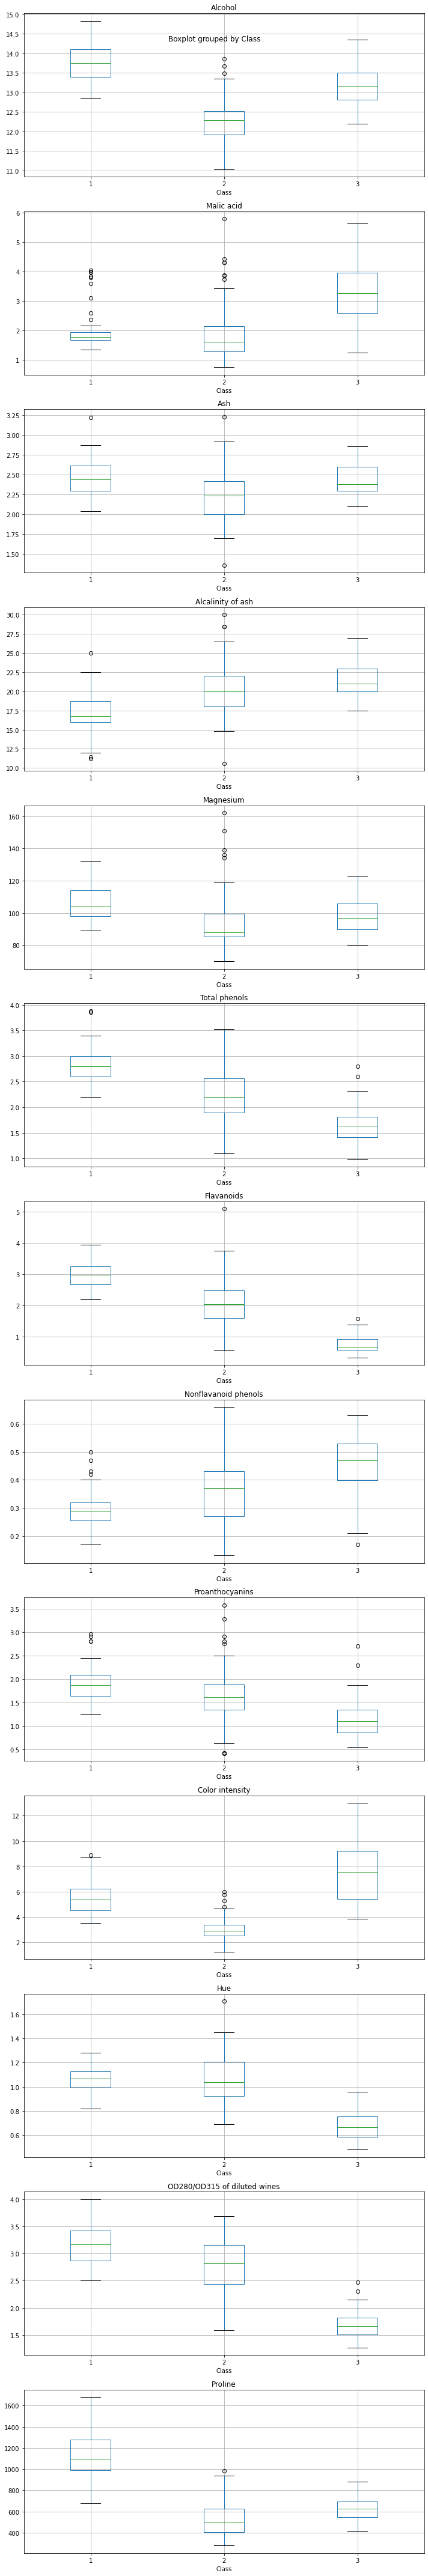

In [6]:
columns_to_show = df.columns[:-1]


fig, ax = plt.subplots(len(columns_to_show), figsize=(10, 60))
plt.suptitle('')

for i in range(len(columns_to_show)):
    df.boxplot(column=[columns_to_show[i]], by='Class', ax=ax[i])
    
plt.tight_layout()  

# TODO: que faire des scatter plots ?? 2 propriétés entre-elles ?

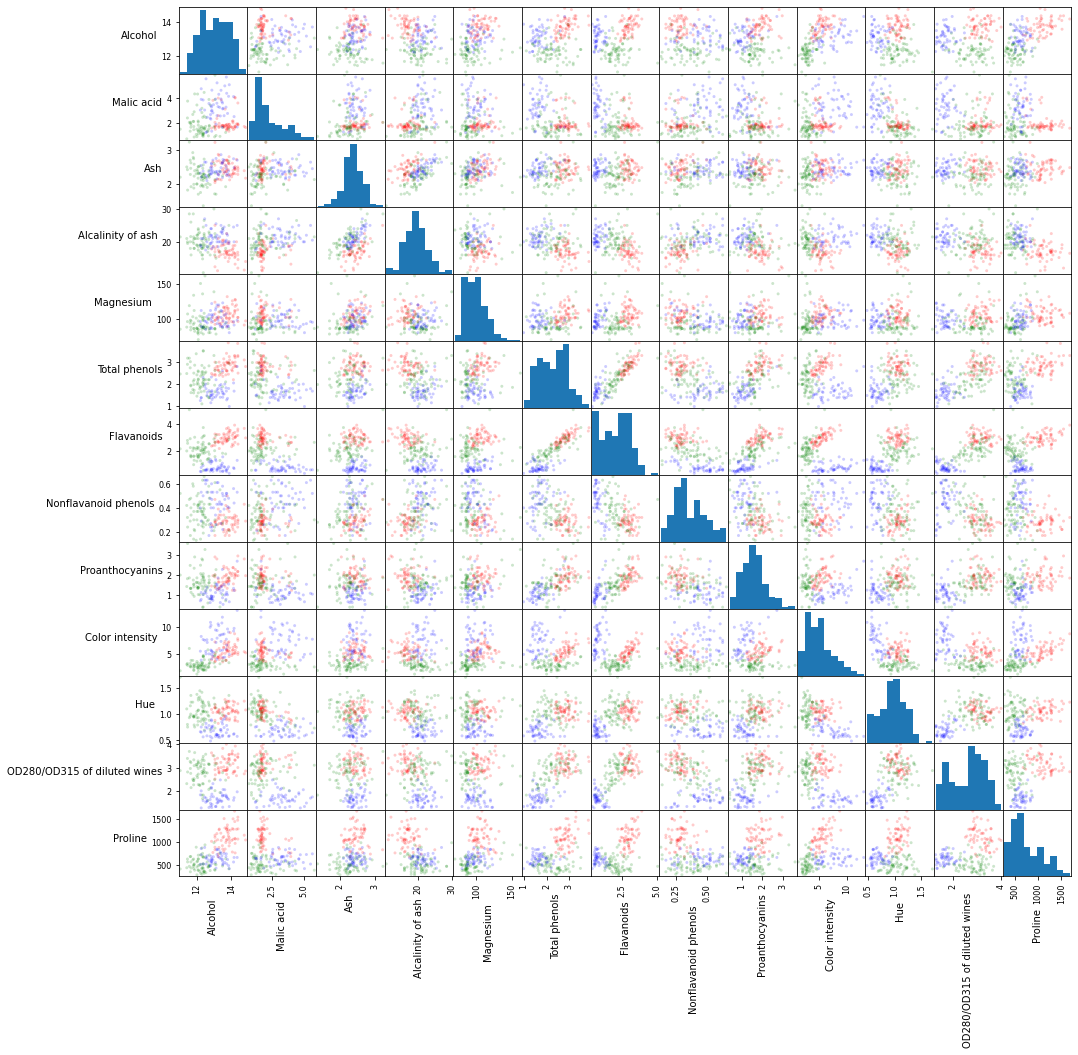

In [10]:
without_class = df.drop('Class', 1)
colors = np.array(59*['r']+71*['g']+48*['b'])
axes = pd.plotting.scatter_matrix(without_class, alpha=0.2, figsize=(16,16), color=colors)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

* Variables avec très peu de variabilité: Ash, Magnesium

* Variables qui ont des valeurs différentes pour les différentes classes: Flavanoids, Total phenols, Alcohol

# 2. Modèle à base de règles

Utilisez les box-plots des variables qui ont une majorité de valeurs différentes pour les différentes classes afin de programmer des règles (if-then-else) permettant la classification de chaque observation.   
**a)** Essayez au moins trois variables de manière individuelle et   
**b)** deux classificateurs à multiples variables (p.ex., deux ou trois) et évaluez le nombre d’observations qui sont correctement classées (accuracy) par ses modèles.

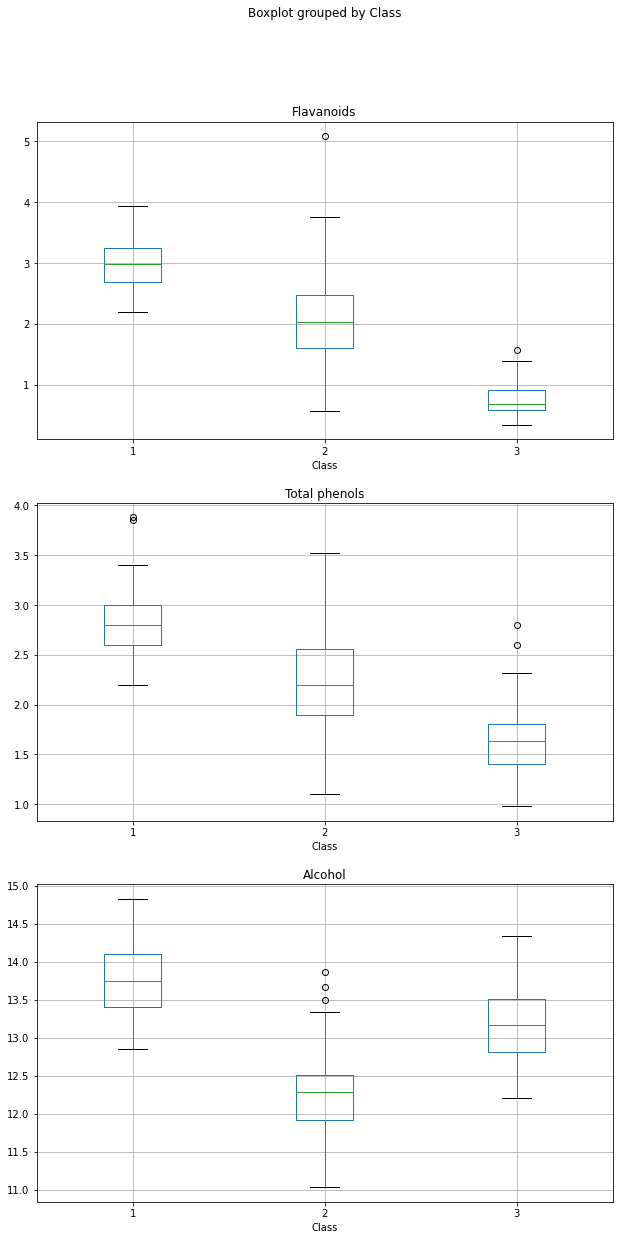

In [7]:
column_names = ['Flavanoids', 'Total phenols', 'Alcohol']
columns_to_show = df.filter(items=column_names).columns

fig, ax = plt.subplots(len(columns_to_show), figsize=(10, 20))
plt.suptitle('')

for i in range(len(columns_to_show)):
    df.boxplot(column=[columns_to_show[i]], by='Class', ax=ax[i])
    
#plt.tight_layout()  

In [8]:
column_names = ['Flavanoids', 'Total phenols', 'Alcohol', 'Class']

print(df.filter(items=column_names).groupby('Class').describe())

# Conditions Flavanoids:
def classify_by_flav(flav):
    if(flav >= 2.68 and flav <= 3.245):
        class_number = 1
    elif (flav >= 1.605 and flav <= 2.475):
        class_number = 2
    elif (flav >= 0.580 and flav <= 0.920):
        class_number = 3
    else:
        class_number = -1
    return class_number
    
# Conditions Total phenols:
def classify_by_phenols(phenols):
    if(phenols >= 2.6 and phenols <= 3.0):
        class_number = 1
    elif (phenols >= 1.895 and phenols <= 2.56):
        class_number = 2
    elif (phenols >= 1.4075 and phenols <= 1.8075):
        class_number = 3
    else:
        class_number = -1
    return class_number

# Conditions Alcohol :
def classify_by_alcohol(alcohol):
    if(alcohol >= 13.4 and alcohol <= 14.1):
        class_number = 1
    elif (alcohol >= 11.915 and alcohol <= 12.515):
        class_number = 2
    elif (alcohol >= 12.805 and alcohol <= 13.505):
        class_number = 3
    else:
        class_number = -1
    return class_number



      Flavanoids                                                       \
           count      mean       std   min    25%    50%    75%   max   
Class                                                                   
1           59.0  2.982373  0.397494  2.19  2.680  2.980  3.245  3.93   
2           71.0  2.080845  0.705701  0.57  1.605  2.030  2.475  5.08   
3           48.0  0.781458  0.293504  0.34  0.580  0.685  0.920  1.57   

      Total phenols            ...               Alcohol                       \
              count      mean  ...     75%   max   count       mean       std   
Class                          ...                                              
1              59.0  2.840169  ...  3.0000  3.88    59.0  13.744746  0.462125   
2              71.0  2.258873  ...  2.5600  3.52    71.0  12.278732  0.537964   
3              48.0  1.678750  ...  1.8075  2.80    48.0  13.153750  0.530241   

                                             
         min     25%     50%

In [9]:
# b) Classificateurs à multiples variables:

'''
# 1) Flavanoids + Color intensity
first_cols = ['Flavanoids', 'Color intensity']

# 2) OD280/OD315 of diluted wines + Proline
second_cols = ['OD280/OD315 of diluted wines', 'Proline']


def classify_by_multiple_variables(df, row, column_names):
    row = row.groupby('Class').quantile([0.25, 0.75])
    filtered = df.filter(items=column_names + ['Class']).groupby('Class').quantile([0.25, 0.75])
    class_number = -1
    for name in column_names:
        if(filtered[name][1][0.25]):
            print('todo')
        elif(true):
            print(filtered['Flavanoids'][1][0.25])
    

print(df.loc[0].quantile([0.25, 0.75]))
    
classify_by_multiple_variables(df, df.loc[0], first_cols)
#classify_by_multiple_variables(df, second_cols)
'''

def classify_by_flav_phenols(row):
    class_phenols = classify_by_phenols(row['Total phenols'])
    class_flav = classify_by_flav(row['Flavanoids'])
    
    if(class_phenols == class_flav):
        return class_phenols
    else:
        return -1

def classify_by_alcohol_phenols(row):
    class_phenols = classify_by_phenols(row['Total phenols'])
    class_alcohol = classify_by_alcohol(row['Alcohol'])
    
    if(class_phenols == class_alcohol):
        return class_phenols
    else:
        return -1

In [110]:
# Test Flavanoids
flav_counter = 0
for i in range(178):
    val = classify_by_flav(df.loc[i]['Flavanoids'])
    if(val == df.loc[i]['Class']):
        flav_counter += 1
        
print(f'Accuracy Flavonoids: {flav_counter}/178 -> {round(flav_counter / 1.78, 2)}%\n')

# Test Total phenols
phenols_counter = 0
for i in range(178):
    val = classify_by_phenols(df.loc[i]['Total phenols'])
    if(val == df.loc[i]['Class']):
        phenols_counter += 1
        
print(f'Accuracy Total phenols: {phenols_counter}/178 -> {round(phenols_counter / 1.78, 2)}%\n')  

# Test Alcohol
alcohol_counter = 0
for i in range(178):
    val = classify_by_alcohol(df.loc[i]['Alcohol'])
    if(val == df.loc[i]['Class']):
        alcohol_counter += 1
        
print(f'Accuracy Alcohol: {alcohol_counter}/178 -> {round(alcohol_counter / 1.78, 2)}%\n')

# Test Flavonoids + Total phenols
flav_phenols_counter = 0
for i in range(178):
    val = classify_by_flav_phenols(df.loc[i])
    if(val == df.loc[i]['Class']):
        flav_phenols_counter += 1
        
print(f'Accuracy Flavonoids + Total phenols: {flav_phenols_counter}/178 -> {round(flav_phenols_counter / 1.78, 2)}%\n')

# Test Alcohol + Total phenols
alcohol_phenols_counter = 0
for i in range(178):
    val = classify_by_alcohol_phenols(df.loc[i])
    if(val == df.loc[i]['Class']):
        alcohol_phenols_counter += 1
        
print(f'Accuracy Alcohol + Total phenols: {alcohol_phenols_counter}/178 -> {round(alcohol_phenols_counter / 1.78, 2)}%\n')

Accuracy Flavonoids: 92/178 -> 51.69%

Accuracy Total phenols: 95/178 -> 53.37%

Accuracy Alcohol: 83/178 -> 46.63%

Accuracy Flavonoids + Total phenols: 68/178 -> 38.2%

Accuracy Alcohol + Total phenols: 52/178 -> 29.21%



# 3. L’algorithme des k plus proches voisins (k-NN)

Adaptez le code de k-NN vu en classe pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles pour K=1,2,3,5,7,10. 

Utilisez la méthode de validation hold-out (calculez la moyenne de performances en répétant le « split » 10 fois) et la validation croisée avec n_folds=5. 

Présentez un résumé de vos résultats (c.a.d., un tableau avec les résultats ainsi qu’un plot ou bar chart) et commentez ceux-ci.

In [90]:
from math import *
from random import randrange

# Distance euclidienne
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Localisation des voisins
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Calcul des prédictions
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Calcul de précision
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Préparation des données pour évaluation
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# TODO: code ici
K = [1, 2, 3, 5, 7, 10]
n_splits = 10
n_folds = 5
accuracies = {'1': [], '2': [], '3': [], '5': [], '7': [], '10': []}


#print(df_accuracies)

for split in range(n_splits):
    train, dataset_copy = train_test_split(df.values.tolist())
    
    for k in K:
        # for i in range(len(train)):
        accuracy = []
        for fold in range(n_folds):
            predictions = []
            for row in dataset_copy:
                predictions.append(predict_classification(train, row, k))
    
            actual = [row[-1] for row in dataset_copy]
            accuracy.append(accuracy_metric(actual, predictions))
        accuracies[str(k)].append((np.mean(accuracy)))

df_accuracies = pd.DataFrame(accuracies)   
print(df_accuracies)

# Moyennes par K
print(df_accuracies.mean())

           1          2          3          5          7         10
0  80.281690  70.422535  73.239437  77.464789  73.239437  73.239437
1  74.647887  67.605634  71.830986  67.605634  67.605634  70.422535
2  71.830986  70.422535  73.239437  67.605634  66.197183  66.197183
3  64.788732  67.605634  73.239437  63.380282  71.830986  70.422535
4  70.422535  59.154930  67.605634  73.239437  74.647887  70.422535
5  71.830986  69.014085  73.239437  69.014085  73.239437  69.014085
6  70.422535  66.197183  71.830986  69.014085  69.014085  66.197183
7  76.056338  64.788732  74.647887  74.647887  69.014085  71.830986
8  69.014085  64.788732  69.014085  66.197183  71.830986  69.014085
9  80.281690  69.014085  70.422535  77.464789  73.239437  69.014085
1     72.957746
2     66.901408
3     71.830986
5     70.563380
7     70.985915
10    69.577465
dtype: float64


<class 'pandas.core.series.Series'>


AttributeError: 'dict' object has no attribute 'dropna'

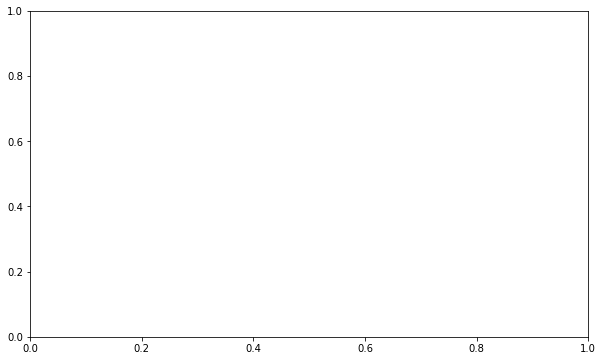

In [105]:
print(type(df_accuracies.mean()))
testX = dict((y,x) for x,y in df_accuracies.mean().iteritems())

plot = pd.plotting.hist_series(testX, legend=True, figsize=(10, 6), bins=6)
pd.swapaxes(plot)
plot.set_title('KNN', fontsize=15)
plot.set_xlabel('K Value', fontsize=14)
plot.set_ylabel('Amount', fontsize=14)
#plot.set_yscale('log')

# 5. L’algorithme LVQ

Utilisez l’algorithme LVQ pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles et calculez la matrice de confusion du meilleur modèle trouvé en explorant différentes valeurs de hyper-paramètres (c.a.d., nombre de prototypes, learning rate et nombre d’epochs), sur l’ensemble de validation pour chaque « fold » de la validation croisée.

Commentez vos résultats et comparez l’accuracy de ce modèle avec celle obtenu avec k-NN. 

In [7]:
from math import sqrt
from random import randrange
from random import seed
from random import shuffle

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)-1):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebook, test_row):
  distances = list()
  for codevector in codebook:
    dist = euclidean_distance(codevector, test_row)
    distances.append((codevector, dist))
  distances.sort(key=lambda tup: tup[1])
  return distances[0][0]

# Create a random codebook vector
def init_codevector(train,category):
  n_records = len(train)
  n_features = len(train[0])-1
  found = False 
  while(not found):
    random_observation = randrange(n_records)
    if (train[random_observation][-1] == category):
      found = True
  codevector = [train[random_observation][i] for i in range(n_features)]
  codevector.append(category)
  return codevector

# Train a set of codebook vectors
def train_codebook(train, n_codevectors, lrate, epochs):
  codebook = [init_codevector(train,i) for i in range(n_codevectors)]
  print(codebook)
  for epoch in range(epochs):
    lrate = lrate * (1.0-(epoch/float(epochs)))
    sum_error = 0.0
    shuffle(train)
    for row in train:
      bmu = get_best_matching_unit(codebook, row)
      for i in range(len(row)-1):
        error = row[i] - bmu[i]
        sum_error += error**2
        if bmu[-1] == row[-1]:
          bmu[i] += lrate * error
        else:
          bmu[i] -= lrate * error
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, lrate, sum_error))
  return codebook

# Test the training function
#seed(1)
dataset = [[2.7810836,2.550537003,0],
  [1.465489372,2.362125076,0],
  [3.396561688,4.400293529,0],
  [1.38807019,1.850220317,0],
  [3.06407232,3.005305973,0],
  [7.627531214,2.759262235,1],
  [5.332441248,2.088626775,1],
  [6.922596716,1.77106367,1],
  [8.675418651,-0.242068655,1],
  [7.673756466,3.508563011,1]]
learn_rate = 0.3
n_epochs = 25
n_codevectors = 2
codebooks = train_codebook(dataset, n_codevectors, learn_rate, n_epochs)
print('Codebook: %s' % codebook)

[[1.465489372, 2.362125076, 0], [5.332441248, 2.088626775, 1]]
>epoch=0, lrate=0.300, error=39.782
>epoch=1, lrate=0.288, error=29.416
>epoch=2, lrate=0.265, error=27.891
>epoch=3, lrate=0.233, error=26.956
>epoch=4, lrate=0.196, error=25.011
>epoch=5, lrate=0.157, error=24.728
>epoch=6, lrate=0.119, error=23.779
>epoch=7, lrate=0.086, error=23.132
>epoch=8, lrate=0.058, error=22.545
>epoch=9, lrate=0.037, error=22.095
>epoch=10, lrate=0.022, error=21.780
>epoch=11, lrate=0.013, error=21.572
>epoch=12, lrate=0.007, error=21.443
>epoch=13, lrate=0.003, error=21.371
>epoch=14, lrate=0.001, error=21.334
>epoch=15, lrate=0.001, error=21.316
>epoch=16, lrate=0.000, error=21.309
>epoch=17, lrate=0.000, error=21.306
>epoch=18, lrate=0.000, error=21.305
>epoch=19, lrate=0.000, error=21.305
>epoch=20, lrate=0.000, error=21.305
>epoch=21, lrate=0.000, error=21.305
>epoch=22, lrate=0.000, error=21.305
>epoch=23, lrate=0.000, error=21.305
>epoch=24, lrate=0.000, error=21.305
Codebook: [[2.45486931

Text(0, 0.5, 'x2')

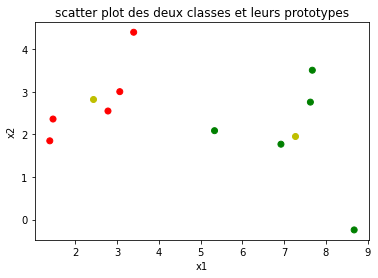

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
colors = ['r','g','b']
plt.scatter([i[0] for i in codebooks],[j[1] for j in codebooks],c='y')
plt.scatter([i[0] for i in dataset],[j[1] for j in dataset],c=[colors[k[2]] for k in dataset])
plt.title("scatter plot des deux classes et leurs prototypes")
plt.xlabel("x1")
plt.ylabel("x2")